In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
df = pd.read_csv('/content/tsdata.csv',
                 parse_dates=True,
                 index_col='date'
                 )
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 204 entries, 1991-07-01 to 2008-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   204 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [98]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [99]:
df.tail()

,value
date,
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677
2008-05-01,22.912510
2008-06-01,19.431740


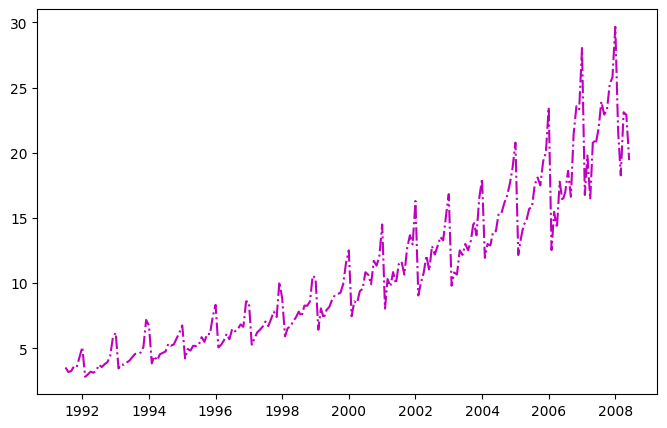

In [100]:
plt.figure(figsize=(8,5))
plt.plot(df['value'], ls='-.', c='m')

In [101]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1000x600 with 0 Axes>

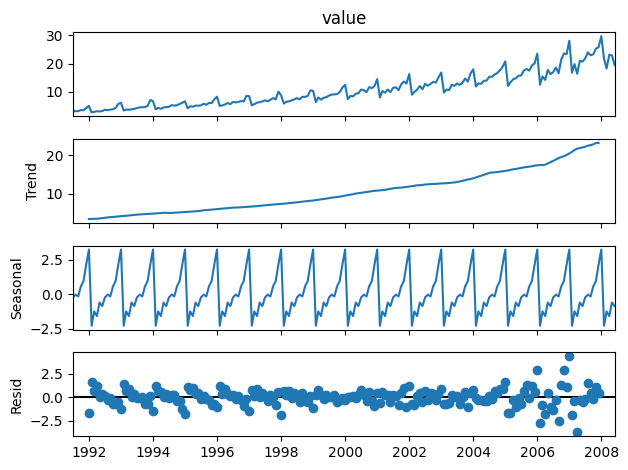

In [102]:
plt.figure(figsize=(10,6))
result = seasonal_decompose(df['value'])
result.plot()
plt.show()

In [103]:
# The above residual is good
# If there is trend in the residual then it is not good

In [104]:
"""

MA - Moving Average
Ar - Auto Regression ( regression on itself )
ARMA - Auto Regressive Moving Average
ARIMA - Auto Regressive Integrated Moving Average
SARIMA - Seasonal Auto Regressive Integrated Moving Average
SARIMAX - Seasonal Auto Regressive Integrated Moving Average with eXogenous variables

"""

'\n\nMA - Moving Average\nAr - Auto Regression ( regression on itself )\nARMA - Auto Regressive Moving Average\nARIMA - Auto Regressive Integrated Moving Average\nSARIMA - Seasonal Auto Regressive Integrated Moving Average\nSARIMAX - Seasonal Auto Regressive Integrated Moving Average with eXogenous variables\n\n'

In [105]:
"""
AR - date becomes index.

Stationary TimedeltaSeries : statistical properties should be constant over time.
It should NOT be function of time.
ex. FD rate in banks is not stationary.
ex. Property rate (normally) is not stationary.
reason - time is the only constraint.

We should make the timeseries stationary.
"""



'\nAR - date becomes index.\n\nStationary TimedeltaSeries : statistical properties should be constant over time.\nIt should NOT be function of time. \nex. FD rate in banks is not stationary.\nex. Property rate (normally) is not stationary.\nreason - time is the only constraint.\n\nWe should make the timeseries stationary.\n'

In [106]:
# adfuller test
# Augmented Dickey-Fuller unit root test.

# The Augmented Dickey-Fuller test can be used to test for a unit root in a
# univariate process in the presence of serial correlation.

# H0 - Series not stationary
# H1 - Series stationary

# p>0.05 accept H0

from statsmodels.tsa.stattools import adfuller

In [107]:
adfuller(df['value'])

(np.float64(3.14518568930673),
 1.0,
 15,
 188,
 {'1%': np.float64(-3.465620397124192),
  '5%': np.float64(-2.8770397560752436),
  '10%': np.float64(-2.5750324547306476)},
 np.float64(549.6705685364174))

In [108]:
p = adfuller(df['value'])[1]

if p>0.05 : print("accept H0, series NOT stationary")
else : print("Reject H0, series is stationary")



accept H0, series NOT stationary


In [109]:
p = adfuller(df['value'].diff(1).dropna())[1]

if p>0.05 : print("accept H0, series still NOT stationary")
else : print("Reject H0, series is stationary")

accept H0, series still NOT stationary


In [110]:
df['L1diff'] = df['value'].diff(1)
adfuller(df['L1diff'].diff(1).dropna())[1]

if p>0.05 : print("accept H0, series NOT stationary")
else : print("Reject H0, series is stationary")

accept H0, series NOT stationary


In [111]:
# ARIMA :
#   p : order of AR model
#   d : order to make TS stationary
#   q : order of MA model

#   PACF : Partial Autocorrelation Function
#   ACF : Autocorrelation Function

In [112]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x600 with 0 Axes>

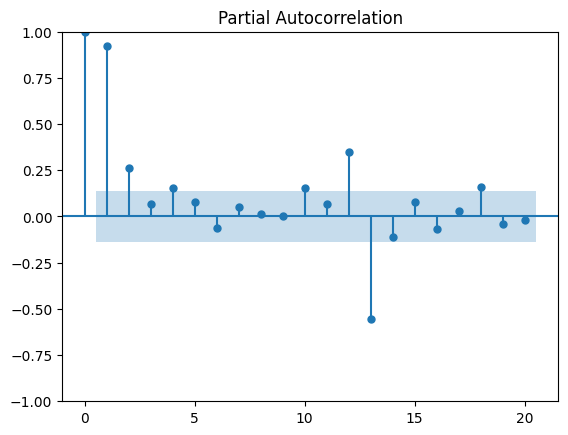

In [113]:
# degree of AR model - pacf plot

# the partial auto correlation of each timestamp with its lag( means previous timestamp )
plt.figure(figsize=(10,6))
plot_pacf(df['value'],lags=20,)
plt.show()

<Figure size 1200x200 with 0 Axes>

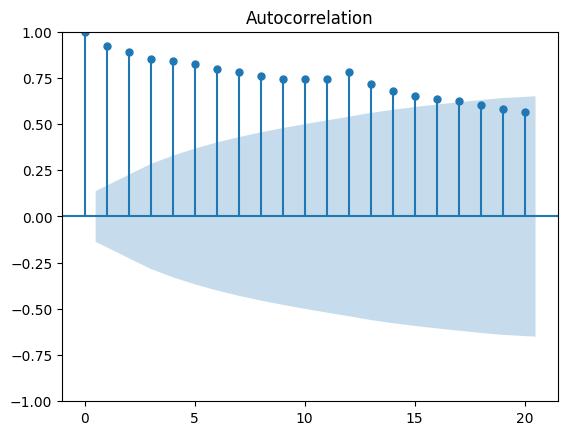

In [114]:
# degree of MA model - acf plot

plt.figure(figsize=(12,2))
plot_acf(df['value'], lags=20)
plt.show()

In [115]:
# we're gooing to ignore this, we'll keep the degree of MA model to 0

In [116]:
# if pacf has significant spike at p and the acf plot decays gradually, consider pd0 model.
# if acf has significant spike at q and the act plot decays gradually, consider 0dq model.

In [117]:
df.shape

(204, 2)

In [118]:
204  * 80 / 100

163.2

In [119]:
xtrain = df.iloc[:163, [0]].values
xtest = df.iloc[163:, [0]].values
xtrain.shape,xtest.shape

((163, 1), (41, 1))

In [120]:
from statsmodels.tsa.arima.model import ARIMA

In [121]:
# ARIMA :

# AR - autoregressive model    AR( p )
# I - integrated model         ARIMA(p, d, q)
# MA - moving average model    MA(q)
# ARMA - mixed autoregressice average model

In [122]:
model = ARIMA(xtrain, order=(13,2,1))
# order(p,d,q) (AR, stationary, MA)
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


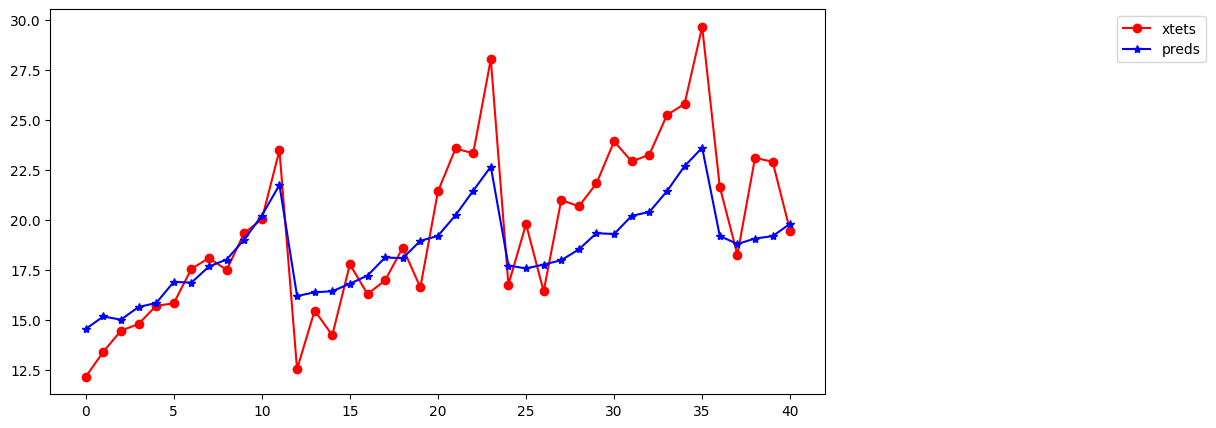

In [123]:
yhat = model_fit.forecast(steps=41)
plt.figure(figsize=(10,5))
plt.plot(xtest, c='r',marker='o', label = 'xtets')
plt.plot(yhat, c='b', marker='*', label='preds')
plt.legend(bbox_to_anchor=(1.5,1)),
plt.show()

In [172]:
cdf = pd.read_csv('/content/Quote-Equity-COALINDIA-EQ-06-12-2024-06-12-2025.csv')
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            249 non-null    object 
 1   SERIES          249 non-null    object 
 2   OPEN            249 non-null    float64
 3   HIGH            249 non-null    float64
 4   LOW             249 non-null    float64
 5   PREV. CLOSE     249 non-null    float64
 6   LTP             249 non-null    float64
 7   CLOSE           249 non-null    float64
 8   VWAP            249 non-null    float64
 9   52W H           249 non-null    float64
 10  52W L           249 non-null    float64
 11  VOLUME          249 non-null    int64  
 12  VALUE           249 non-null    object 
 13  NO. OF  TRADES  249 non-null    int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 27.4+ KB


In [173]:
cdf.head()

,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO. OF TRADES
0,05-Dec-2025,EQ,378.90,380.65,376.50,379.05,379.95,379.95,379.51,425.9,349.25,3154258,"1,19,70,84,282.15",36336
1,04-Dec-2025,EQ,375.00,379.75,373.80,375.25,379.00,379.05,377.23,425.9,349.25,3135061,"1,18,26,30,295.60",49724
2,03-Dec-2025,EQ,378.95,379.30,372.20,378.95,375.25,375.25,374.33,425.9,349.25,4650434,"1,74,07,95,021.95",62340
3,02-Dec-2025,EQ,379.50,379.90,376.75,379.65,379.10,378.95,378.56,425.9,349.25,3695491,"1,39,89,79,372.05",47164
4,01-Dec-2025,EQ,376.90,380.00,375.80,376.15,379.85,379.65,378.28,425.9,349.25,4217206,"1,59,52,72,339.95",62208


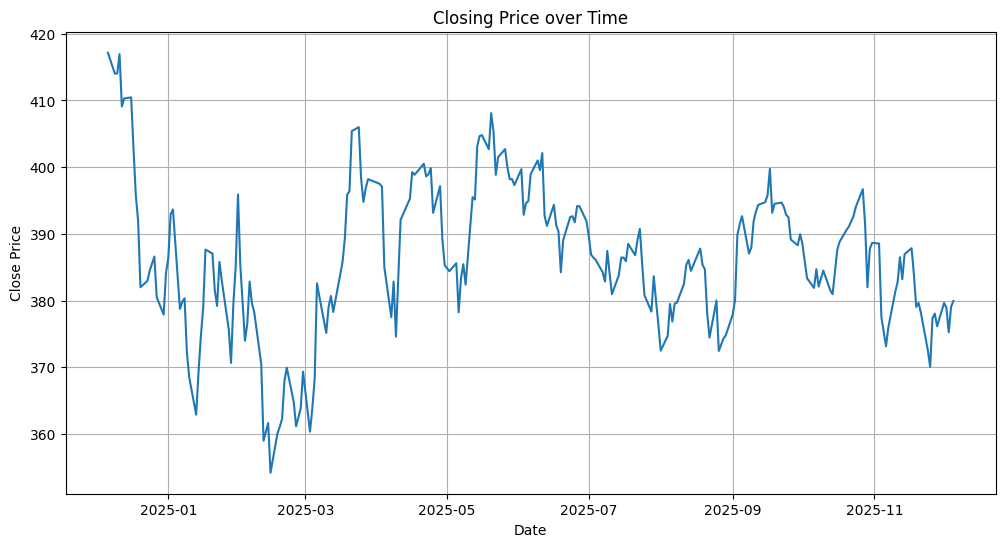

In [176]:
cdf['DATE'] = pd.to_datetime(cdf['DATE'], format='%d-%b-%Y')
cdf['CLOSE'] = cdf['CLOSE'].astype(float)
plt.figure(figsize=(12, 6))
plt.plot(cdf['DATE'], cdf['CLOSE'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Price over Time')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

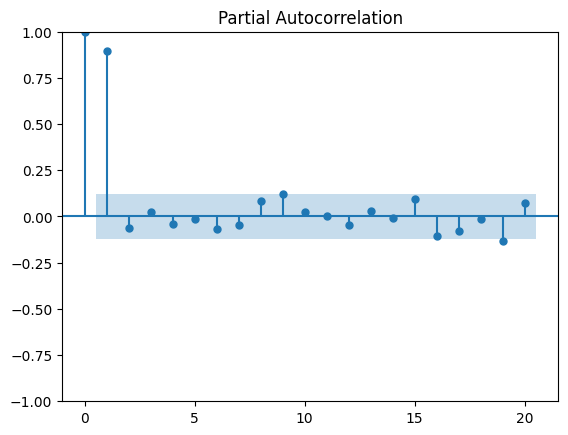

In [177]:
plt.figure(figsize=(10,6))
plot_pacf(cdf['CLOSE'],lags=20,)
plt.show()

<Figure size 1200x200 with 0 Axes>

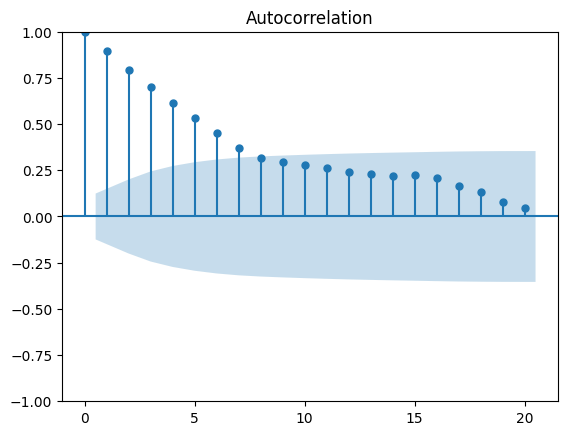

In [178]:
plt.figure(figsize=(12,2))
plot_acf(cdf['CLOSE'], lags=20)
plt.show()